In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file_path = 'Docs/Pay Ops BI Lead Homework (9).xlsx'

excel_file = pd.ExcelFile(file_path)

print(excel_file.sheet_names)

['Question', 'Quality Standards (Reference)', 'Definitions', 'Global linking wait time bucket', 'Global linking escalations and ', 'Global DU wait time buckets', 'Global DU escalations and escal', 'Regional NM & ACH inputs by tea', 'Regional NM & ACH outputs by te']


In [3]:
sheet_names = ['Global linking wait time bucket'
               , 'Global linking escalations and '
               , 'Global DU wait time buckets'
               , 'Global DU escalations and escal'
               , 'Regional NM & ACH inputs by tea'
               , 'Regional NM & ACH outputs by te']

In [4]:
dfs = pd.read_excel(file_path, sheet_name=sheet_names)

<h2>Global Linking vs Global DU Wait Time</h2>

In [5]:
df_gl = dfs['Global linking wait time bucket']
df_gl = df_gl.drop(index=0).reset_index(drop=True)
df_gl.head()

,Wait Hour Buckets,1. Within 1h,2. Within 2h,3. Within 4h,4. Within 8h,5. Within 12h,6. Within 24h,7. Within 48h,8. Within 72h,9. Over 72h
0,2024-10-28 00:00:00,4156,4243,3120,1691,470,523,269,1,2
1,2024-10-21 00:00:00,6279,3171,2638,1340,69,9,NaN,NaN,1
2,2024-10-14 00:00:00,6470,3347,2557,889,272,368,3,NaN,NaN
3,2024-10-07 00:00:00,5402,3124,4171,2546,132,1,1,NaN,NaN
4,2024-09-30 00:00:00,1212,284,956,5750,2837,5957,395,23,NaN


In [6]:
df_gl_pvt = df_gl.melt(id_vars=['Wait Hour Buckets'], 
                     var_name='Hour range', 
                     value_name='Count')

In [7]:
df_gl_pvt['Type'] = 'Global Linking Wait Time'
df_gl_pvt.head()

,Wait Hour Buckets,Hour range,Count,Type
0,2024-10-28,1. Within 1h,4156,Global Linking Wait Time
1,2024-10-21,1. Within 1h,6279,Global Linking Wait Time
2,2024-10-14,1. Within 1h,6470,Global Linking Wait Time
3,2024-10-07,1. Within 1h,5402,Global Linking Wait Time
4,2024-09-30,1. Within 1h,1212,Global Linking Wait Time


In [8]:
df_gdu = dfs['Global DU wait time buckets']
df_gdu = df_gdu.drop(index=0).reset_index(drop=True)
df_gdu.head()

,Wait Hour Buckets,1. Within 1h,2. Within 2h,3. Within 4h,4. Within 8h,5. Within 12h,6. Within 24h,7. Within 48h,8. Within 72h
0,2024-10-28 00:00:00,1069,701,662,213,172,282,65,NaN
1,2024-10-21 00:00:00,1009,485,863,596,91,NaN,NaN,NaN
2,2024-10-14 00:00:00,1476,453,674,633,165,378,194,NaN
3,2024-10-07 00:00:00,784,813,907,831,236,2,NaN,NaN
4,2024-09-30 00:00:00,137,11,8,161,613,2246,421,34


In [9]:
df_gdu_pvt = df_gdu.melt(id_vars=['Wait Hour Buckets'], 
                     var_name='Hour range', 
                     value_name='Count')

In [10]:
df_gdu_pvt['Type'] = 'Global DU Wait Time'
df_gdu_pvt.head()

,Wait Hour Buckets,Hour range,Count,Type
0,2024-10-28,1. Within 1h,1069,Global DU Wait Time
1,2024-10-21,1. Within 1h,1009,Global DU Wait Time
2,2024-10-14,1. Within 1h,1476,Global DU Wait Time
3,2024-10-07,1. Within 1h,784,Global DU Wait Time
4,2024-09-30,1. Within 1h,137,Global DU Wait Time


In [11]:
df_globalWaitTime = pd.concat([df_gl_pvt,df_gdu_pvt],ignore_index=True)

In [46]:
df_globalWaitTime['Month'] = df_globalWaitTime['Wait Hour Buckets'].dt.month
df_globalWaitTime['Month_name'] = df_globalWaitTime['Wait Hour Buckets'].dt.month_name()
df_globalWaitTime['Year'] = df_globalWaitTime['Wait Hour Buckets'].dt.year

In [41]:
def assign_quarter(month):
    if month in [5, 6, 7]:
        return 'Q1'
    elif month in [8, 9, 10]:
        return 'Q2'
    else:
        return 'Other'  # Meses não especificados

# Aplicando a função ao DataFrame
df_globalWaitTime['Quarter_Custom'] = df_globalWaitTime['Month'].apply(assign_quarter)

In [42]:
df_globalWaitTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Wait Hour Buckets  521 non-null    datetime64[ns]
 1   Hour range         521 non-null    object        
 2   Count              385 non-null    object        
 3   Type               521 non-null    object        
 4   Month              521 non-null    int32         
 5   Year               521 non-null    int32         
 6   Quarter_Custom     521 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 24.6+ KB


In [14]:
df_globalWaitTime.head()

,Wait Hour Buckets,Hour range,Count,Type,Month,Year
0,2024-10-28,1. Within 1h,4156,Global Linking Wait Time,10,2024
1,2024-10-21,1. Within 1h,6279,Global Linking Wait Time,10,2024
2,2024-10-14,1. Within 1h,6470,Global Linking Wait Time,10,2024
3,2024-10-07,1. Within 1h,5402,Global Linking Wait Time,10,2024
4,2024-09-30,1. Within 1h,1212,Global Linking Wait Time,9,2024


In [47]:
grouped_df = df_globalWaitTime.groupby(['Year','Month','Month_name','Quarter_Custom','Type','Hour range'], as_index=False)['Count'].sum()

filtered_df = grouped_df[(grouped_df['Year'] == 2024) & (grouped_df['Month'] > 4)]

filtered_df.to_csv('chart1.csv')

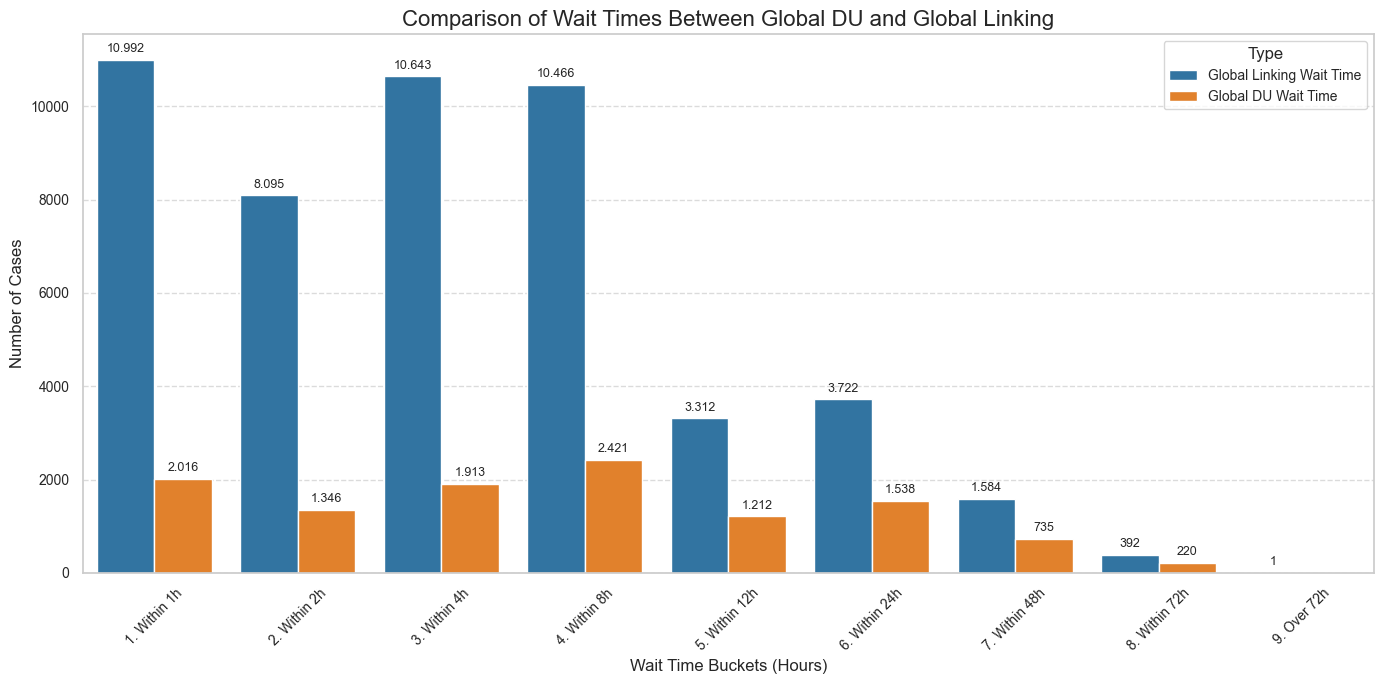

In [16]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=filtered_df, x="Hour range", y="Count", hue="Type", palette=["#1f77b4", "#ff7f0e"], errorbar=None)

plt.title("Comparison of Wait Times Between Global DU and Global Linking", fontsize=16)
plt.xlabel("Wait Time Buckets (Hours)", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title="Type", loc="upper right", fontsize=10, title_fontsize=12)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0: 
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 100, f'{height:,.0f}'.replace(",", "."), 
            ha='center', va='bottom', fontsize=9
        )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2>Global Linking vs Global Escalations</h2>

In [17]:
df_gle = dfs['Global linking escalations and ']
df_gle['Type'] = 'Global linking escalations'
df_gle.head()

,Action Created Parameter,No of Escalations,Escalation Rate,Type
0,2024-10-28,2329,0.1609,Global linking escalations
1,2024-10-21,2334,0.1728,Global linking escalations
2,2024-10-14,2725,0.1960,Global linking escalations
3,2024-10-07,2810,0.1827,Global linking escalations
4,2024-09-30,2982,0.1712,Global linking escalations


In [18]:
df_gdue = dfs['Global DU escalations and escal']
df_gdue['Type'] = 'Global DU escalations'
df_gdue.head()

,Action Created Parameter,No of Escalations,Escalation Rate,Type
0,2024-10-28,879,0.2743,Global DU escalations
1,2024-10-21,1011,0.3232,Global DU escalations
2,2024-10-14,1046,0.2612,Global DU escalations
3,2024-10-07,1168,0.3211,Global DU escalations
4,2024-09-30,1066,0.2828,Global DU escalations


In [48]:
df_globalEscalation = pd.concat([df_gle,df_gdue],ignore_index=True)

df_globalEscalation['Month'] = df_globalEscalation['Action Created Parameter'].dt.month
df_globalEscalation['Month_name'] = df_globalEscalation['Action Created Parameter'].dt.month_name()
df_globalEscalation['Year'] = df_globalEscalation['Action Created Parameter'].dt.year

In [49]:
def assign_quarter(month):
    if month in [5, 6, 7]:
        return 'Q1'
    elif month in [8, 9, 10]:
        return 'Q2'
    else:
        return 'Other'  # Meses não especificados

# Aplicando a função ao DataFrame
df_globalEscalation['Quarter_Custom'] = df_globalEscalation['Month'].apply(assign_quarter)

In [53]:
df_globalEscalation_grouped = df_globalEscalation.groupby(['Year','Month','Month_name','Quarter_Custom','Type'], as_index=False)['No of Escalations'].sum()

In [54]:
df_globalEscalation_filtered= df_globalEscalation_grouped[(df_globalEscalation_grouped['Year'] == 2024) & (df_globalEscalation_grouped['Month'] > 4)]
df_globalEscalation_filtered

,Year,Month,Month_name,Quarter_Custom,Type,No of Escalations
6,2024,5,May,Q1,Global linking escalations,2299
7,2024,6,June,Q1,Global DU escalations,730
8,2024,6,June,Q1,Global linking escalations,4278
9,2024,7,July,Q1,Global DU escalations,1785
10,2024,7,July,Q1,Global linking escalations,9318
11,2024,8,August,Q2,Global DU escalations,2916
12,2024,8,August,Q2,Global linking escalations,9353
13,2024,9,September,Q2,Global DU escalations,5468
14,2024,9,September,Q2,Global linking escalations,14028
15,2024,10,October,Q2,Global DU escalations,4104


In [55]:
df_globalEscalation_filtered.to_csv('chart2.csv')

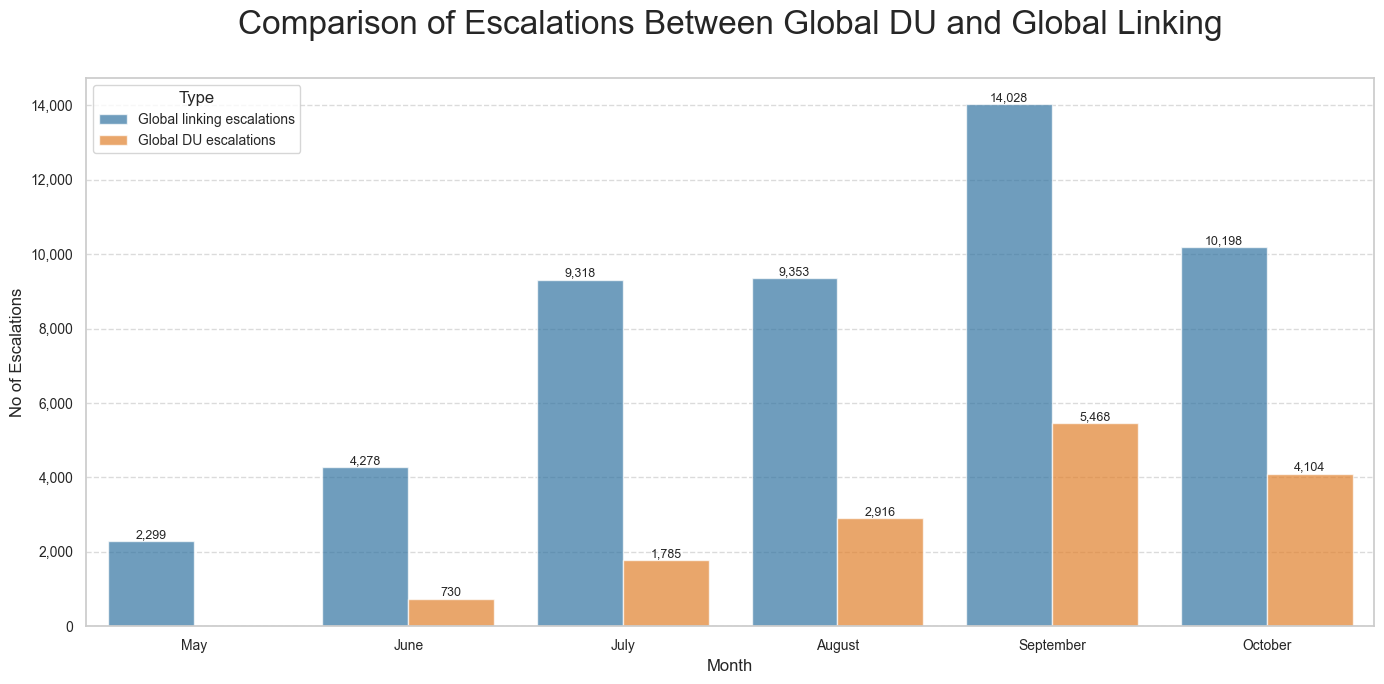

In [156]:
import matplotlib.ticker as mtick

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_globalEscalation_filtered, x='Month_name', y='No of Escalations', hue='Type', palette=["#1f77b4", "#ff7f0e"], alpha=0.7)

plt.title("Comparison of Escalations Between Global DU and Global Linking\n", fontsize=24)
plt.xlabel("Month", fontsize=12)
plt.ylabel("No of Escalations", fontsize=12)

# Format y-axis as 0.###
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0: 
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:,.0f}', 
            ha='center', va='bottom', fontsize=9
        )

plt.legend(title="Type", loc="upper left", fontsize=10, title_fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


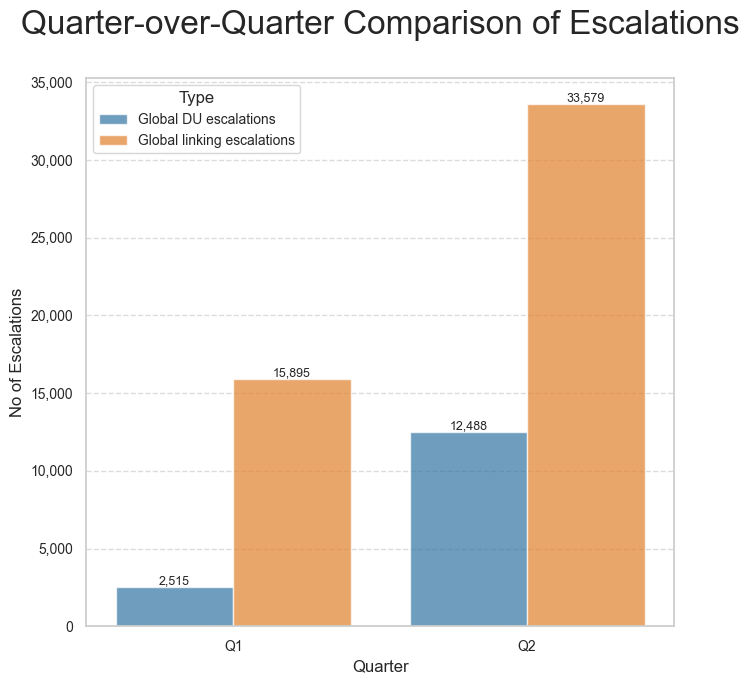

In [155]:
import matplotlib.ticker as mtick

sns.set_theme(style="whitegrid")

# Group data by quarter
df_quarter_comparison = df_globalEscalation_filtered.groupby(['Quarter_Custom', 'Type']).agg({'No of Escalations': 'sum'}).reset_index()

# Create a barplot for quarter-over-quarter comparison
plt.figure(figsize=(7, 7))
ax = sns.barplot(
    data=df_quarter_comparison, 
    x='Quarter_Custom', 
    y='No of Escalations', 
    hue='Type', 
    palette=["#1f77b4", "#ff7f0e"], 
    alpha=0.7
)

# Add titles and labels
plt.title("Quarter-over-Quarter Comparison of Escalations\n", fontsize=24)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("No of Escalations", fontsize=12)

# Format y-axis as 0.###
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Adjust x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values
for bar in ax.patches:
    height = bar.get_height()
    if height > 0: 
        ax.text(
            bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:,.0f}', 
            ha='center', va='bottom', fontsize=9
        )

# Add legend and grid
plt.legend(title="Type", loc="upper left", fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<h2>Regional NM & ACH Inputs and Outputs</h2>

In [23]:
df_rin = dfs['Regional NM & ACH inputs by tea']
df_rin = df_rin.drop(index=0).reset_index(drop=True)
df_rin.head()

,Ops Team Currency,APAC Expansion ops,APAC Mature ops,Emerging ops,EUR ops,Europe ops,GBP ops,JPYKRW ops,NorthAm ops
0,2024-10-28 00:00:00,42,147,36,13,64,19,124,408
1,2024-10-21 00:00:00,22,164,71,10,46,10,109,267
2,2024-10-14 00:00:00,18,199,37,17,51,21,138,358
3,2024-10-07 00:00:00,15,170,54,50,56,47,113,310
4,2024-09-30 00:00:00,14,200,39,66,70,68,156,374


In [24]:
df_rin_pvt = df_rin.melt(id_vars=['Ops Team Currency'], 
                     var_name='Queue', 
                     value_name='Count')

In [25]:
df_rin_pvt.head()

,Ops Team Currency,Queue,Count
0,2024-10-28,APAC Expansion ops,42
1,2024-10-21,APAC Expansion ops,22
2,2024-10-14,APAC Expansion ops,18
3,2024-10-07,APAC Expansion ops,15
4,2024-09-30,APAC Expansion ops,14


In [26]:
df_rin_pvt['Month'] = df_rin_pvt['Ops Team Currency'].dt.month
df_rin_pvt['Month_name'] = df_rin_pvt['Ops Team Currency'].dt.month_name()
df_rin_pvt['Year'] = df_rin_pvt['Ops Team Currency'].dt.year

In [27]:
def assign_quarter(month):
    if month in [5, 6, 7]:
        return 'Q1'
    elif month in [8, 9, 10]:
        return 'Q2'
    else:
        return 'Other'  # Meses não especificados

# Aplicando a função ao DataFrame
df_rin_pvt['Quarter_Custom'] = df_rin_pvt['Month'].apply(assign_quarter)


In [28]:
df_df_rin_pvt_grouped = df_rin_pvt.groupby(['Year','Month','Quarter_Custom','Queue'], as_index=False)['Count'].sum()

df_df_rin_pvt_filtered= df_df_rin_pvt_grouped[(df_df_rin_pvt_grouped['Year'] == 2024) & (df_df_rin_pvt_grouped['Month'] > 4)]

In [59]:
df_df_rin_pvt_filtered.head()

,Year,Month,Quarter_Custom,Queue,Count
48,2024,5,Q1,APAC Expansion ops,40
49,2024,5,Q1,APAC Mature ops,1147
50,2024,5,Q1,EUR ops,312
51,2024,5,Q1,Emerging ops,149
52,2024,5,Q1,Europe ops,209


<h2>Outputs</h2>

In [30]:
df_rou = dfs['Regional NM & ACH outputs by te']
df_rou = df_rou.drop(index=0).reset_index(drop=True)
df_rou.head()

,Internal Action Actor Payops Team,APAC Expansion ops,APAC Mature ops,BRL ops,CEE ops,Central ops,CNO ops,Emerging ops,EUR ops,Europe & UK (Area),...,LatAm ops,NorthAm ops,Ops APAC - Global Processing,Pacific ops,ROSEA ops,SGDMYR ops,South Asia ops,SWIFT ops,Training,Unnamed: 33
0,2024-10-28 00:00:00,30,14,NaN,NaN,3,NaN,35,5,NaN,...,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,2024-10-21 00:00:00,16,85,NaN,NaN,47,NaN,68,3,NaN,...,NaN,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-14 00:00:00,13,128,NaN,NaN,2,NaN,38,NaN,NaN,...,NaN,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-07 00:00:00,7,85,NaN,NaN,115,NaN,47,11,NaN,...,NaN,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2024-09-30 00:00:00,7,117,NaN,NaN,86,NaN,32,25,NaN,...,NaN,323,NaN,NaN,NaN,NaN,NaN,1,NaN,4


In [31]:
df_rou_pvt = df_rou.melt(id_vars=['Internal Action Actor Payops Team'], 
                     var_name='Queue', 
                     value_name='Count')

In [32]:
df_rou_pvt['Month'] = df_rou_pvt['Internal Action Actor Payops Team'].dt.month
df_rou_pvt['Month_name'] = df_rou_pvt['Internal Action Actor Payops Team'].dt.month_name()
df_rou_pvt['Year'] = df_rou_pvt['Internal Action Actor Payops Team'].dt.year

def assign_quarter(month):
    if month in [5, 6, 7]:
        return 'Q1'
    elif month in [8, 9, 10]:
        return 'Q2'
    else:
        return 'Other'  # Meses não especificados

# Aplicando a função ao DataFrame
df_rou_pvt['Quarter_Custom'] = df_rou_pvt['Month'].apply(assign_quarter)

In [33]:
df_rou_pvt_grouped = df_rou_pvt.groupby(['Year','Month','Quarter_Custom','Queue'], as_index=False)['Count'].sum()

df_rou_pvt_filtered= df_rou_pvt_grouped[(df_rou_pvt_grouped['Year'] == 2024) & (df_rou_pvt_grouped['Month'] > 4)]

In [60]:
df_rou_pvt_filtered.head()

,Year,Month,Quarter_Custom,Queue,Count
198,2024,5,Q1,APAC Expansion ops,0
199,2024,5,Q1,APAC Mature ops,0
200,2024,5,Q1,BRL ops,72
201,2024,5,Q1,CEE ops,19
202,2024,5,Q1,CNO ops,150


In [63]:
df_regional_input_output = pd.merge(df_df_rin_pvt_filtered, df_rou_pvt_filtered, on=['Year','Month','Quarter_Custom','Queue'], how='outer')

In [68]:
df_regional_input_output.rename(columns={'Count_x':'Input', 'Count_y':'Output'}, inplace=True)

In [69]:
df_regional_input_output.head()

,Year,Month,Quarter_Custom,Queue,Input,Output
0,2024,5,Q1,APAC Expansion ops,40,0
1,2024,5,Q1,APAC Mature ops,1147,0
2,2024,5,Q1,BRL ops,NaN,72
3,2024,5,Q1,CEE ops,NaN,19
4,2024,5,Q1,CNO ops,NaN,150


In [85]:
df_regional_input_output['Input'] = pd.to_numeric(df_regional_input_output['Input'], errors='coerce')
df_regional_input_output['Output'] = pd.to_numeric(df_regional_input_output['Output'], errors='coerce')

In [120]:
df_regional_input_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            198 non-null    int32 
 1   Month           198 non-null    int32 
 2   Quarter_Custom  198 non-null    object
 3   Queue           198 non-null    object
 4   Input           198 non-null    int32 
 5   Output          198 non-null    int32 
dtypes: int32(4), object(2)
memory usage: 6.3+ KB


In [70]:
df_regional_input_output.to_csv('test.csv')

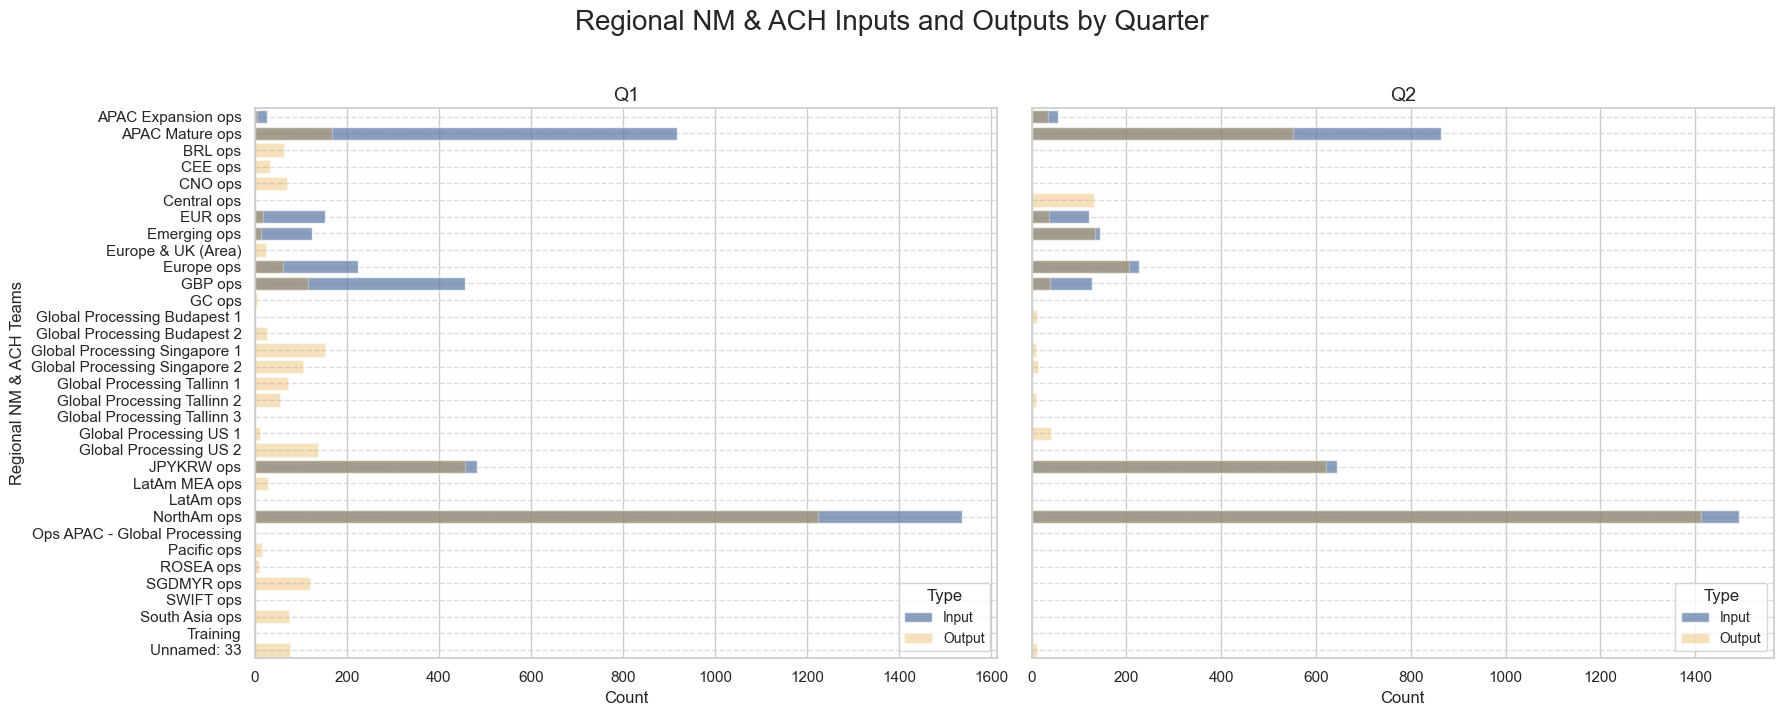

In [147]:
sns.set_theme(style="whitegrid")

# Create a figure with two subplots for Q1 and Q2
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Plot for Q1
data_q1 = df_regional_input_output[df_regional_input_output['Quarter_Custom'] == 'Q1']
sns.barplot(ax=axes[0], data=data_q1, x='Input', y='Queue', label='Input', alpha=0.7, errorbar=None, color='b')
sns.barplot(ax=axes[0], data=data_q1, x='Output', y='Queue', label='Output', alpha=0.3, errorbar=None, color='orange')
axes[0].set_title("Q1", fontsize=14)
axes[0].set_xlabel("Count", fontsize=12)
axes[0].set_ylabel("Regional NM & ACH Teams", fontsize=12)
axes[0].legend(title="Type", loc="lower right", fontsize=10, title_fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Q2
data_q2 = df_regional_input_output[df_regional_input_output['Quarter_Custom'] == 'Q2']
sns.barplot(ax=axes[1], data=data_q2, x='Input', y='Queue', label='Input', alpha=0.7, errorbar=None, color='b')
sns.barplot(ax=axes[1], data=data_q2, x='Output', y='Queue', label='Output', alpha=0.3, errorbar=None, color='orange')
axes[1].set_title("Q2", fontsize=14)
axes[1].set_xlabel("Count", fontsize=12)
axes[1].set_ylabel("")  # No y-axis label for the second plot
axes[1].legend(title="Type", loc="lower right", fontsize=10, title_fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Set a single overarching title
fig.suptitle("Regional NM & ACH Inputs and Outputs by Quarter", fontsize=20, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()


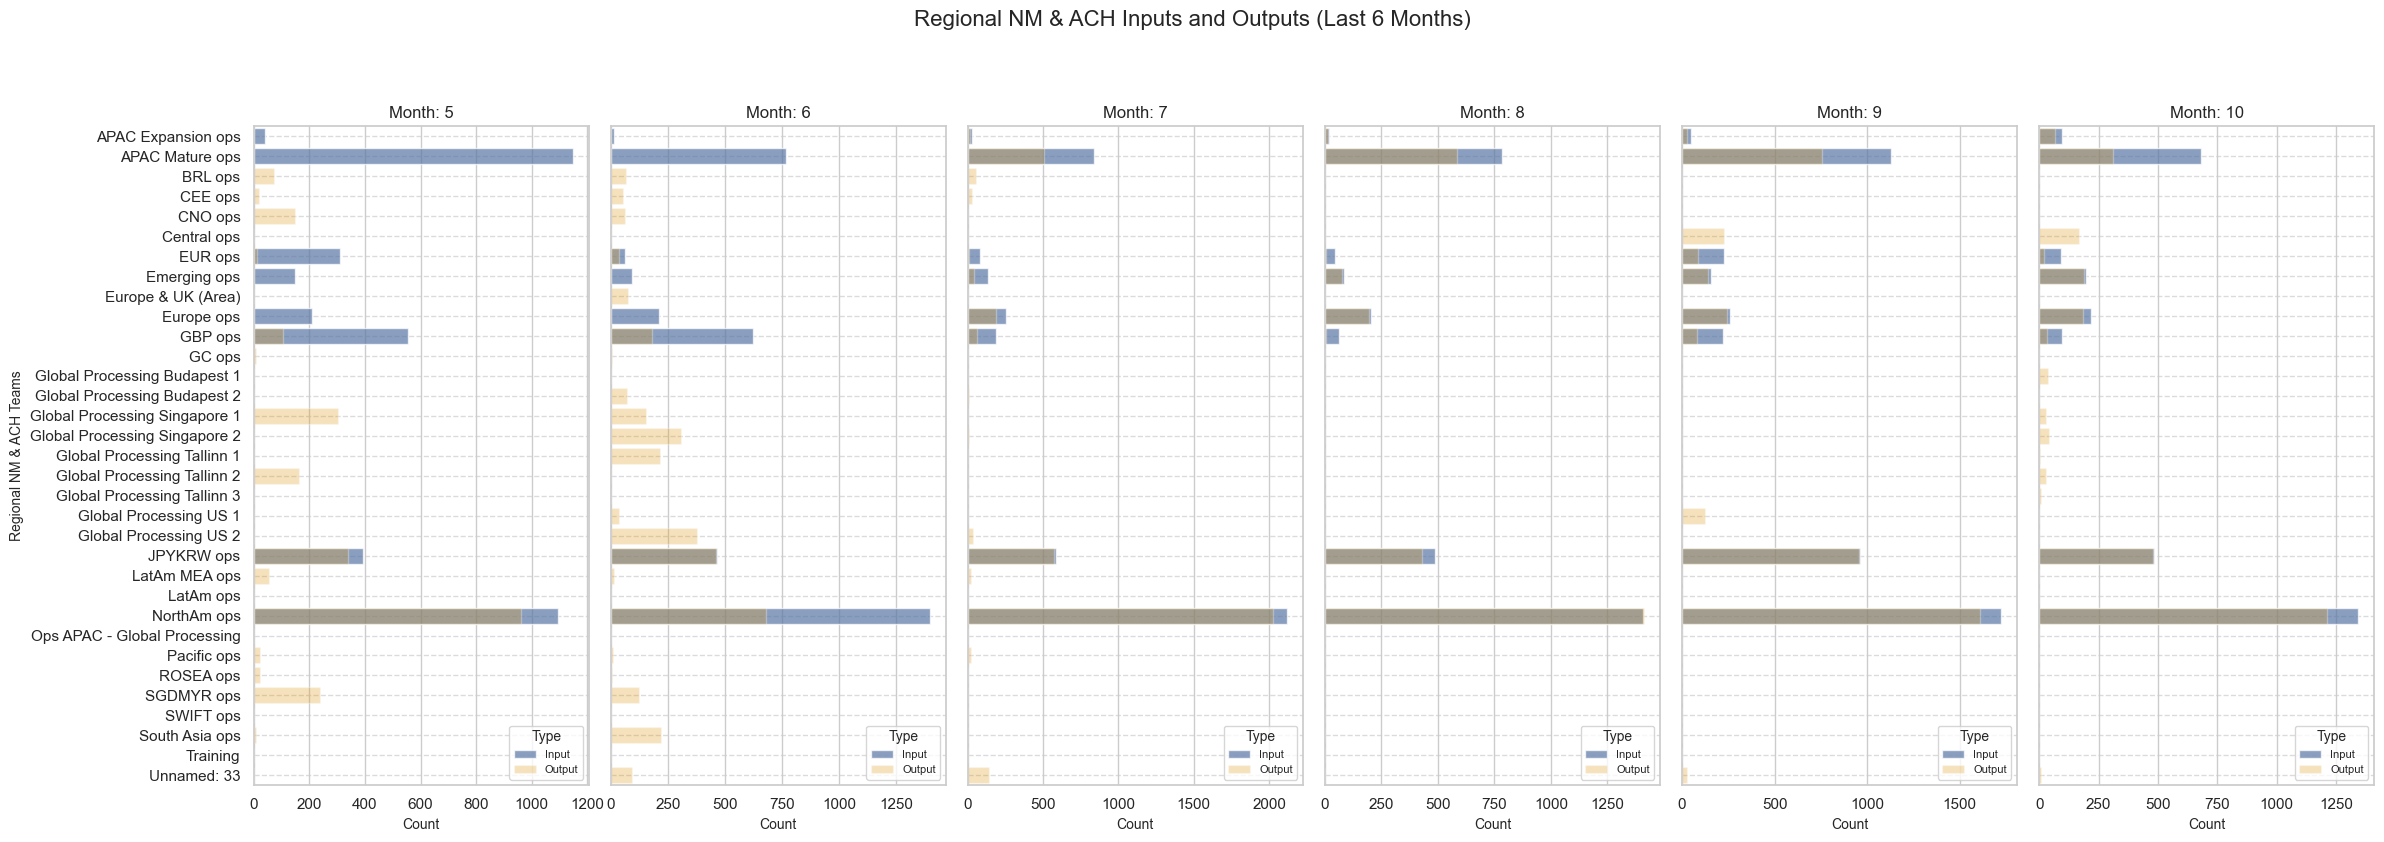

In [150]:
sns.set_theme(style="whitegrid")

# Filter data for the last 6 months
last_6_months = df_regional_input_output['Month'].sort_values(ascending=False).unique()[:6]
data_last_6_months = df_regional_input_output[df_regional_input_output['Month'].isin(last_6_months)]

# Create a figure with 6 subplots for each month
fig, axes = plt.subplots(1, 6, figsize=(24, 8), sharey=True)

# Loop through each month to create subplots
for i, month in enumerate(sorted(last_6_months, reverse=False)):
    month_data = data_last_6_months[data_last_6_months['Month'] == month]
    sns.barplot(
        ax=axes[i],
        data=month_data,
        x='Input',
        y='Queue',
        label='Input',
        alpha=0.7,
        errorbar=None,
        color='b',
    )
    sns.barplot(
        ax=axes[i],
        data=month_data,
        x='Output',
        y='Queue',
        label='Output',
        alpha=0.3,
        errorbar=None,
        color='orange',
    )
    axes[i].set_title(f"Month: {month}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    if i == 0:
        axes[i].set_ylabel("Regional NM & ACH Teams", fontsize=10)
    else:
        axes[i].set_ylabel("")  # No y-axis label for subsequent plots
    axes[i].legend(title="Type", loc="lower right", fontsize=8, title_fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Set a single overarching title
fig.suptitle("Regional NM & ACH Inputs and Outputs (Last 6 Months)", fontsize=16, y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()
